# Finanzas
En este notebook se han llevado los análisis relacionados con las finanzas y el mundo del cine intentando dar respuesta las siguientes preguntas:
* ¿Qué generos son los costosos de producir? ¿Cuáles son más rentables?
* ¿Existe una relación entre el presupuesto y el beneficio obtenido?
* ¿Cuál es el presupuesto óptimo para producir una película rentable?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r generos
%store -r numbers_gen


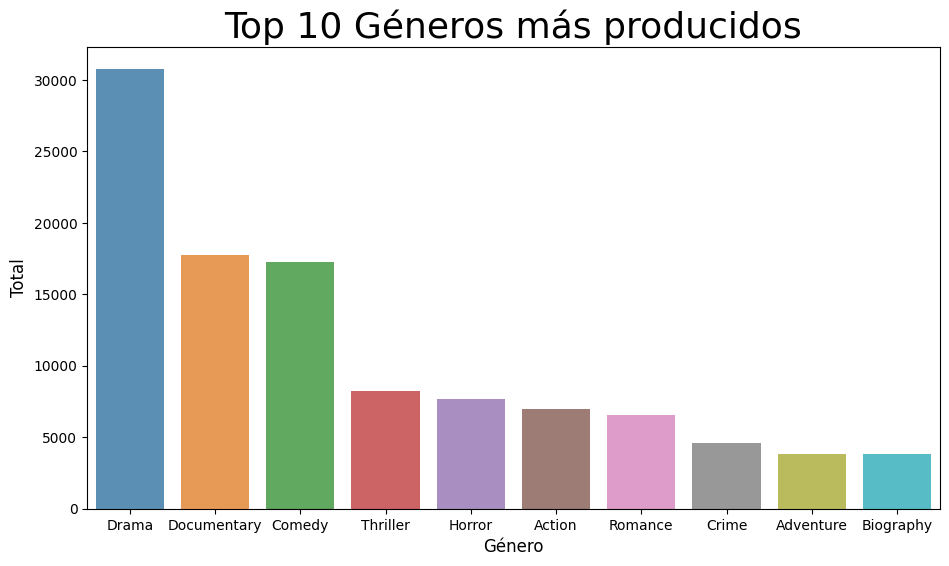

In [2]:
genres_count = generos['genres'].value_counts()
genres_count = genres_count[:10,]
genres_count

plt.figure(figsize=(11,6))
sns.barplot(x=genres_count.index, y=genres_count.values, alpha=0.8)
plt.title('Top 10 Géneros más producidos', fontsize=26)
plt.ylabel('Total', fontsize=12)
plt.xlabel('Género', fontsize=12) 
plt.show()

In [3]:
numbers_gen.info()
numbers_gen.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856705 entries, 0 to 856704
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie              856705 non-null  object 
 1   genres             856705 non-null  object 
 2   averagerating      856705 non-null  float64
 3   production_budget  856705 non-null  int64  
 4   domestic_gross     856705 non-null  int64  
 5   worldwide_gross    856705 non-null  int64  
 6   year               856705 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 52.3+ MB


,movie,genres,averagerating,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,Action,6.1,425000000,760507625,2776345279,2009
1,Avatar,Adventure,6.1,425000000,760507625,2776345279,2009
2,Avatar,Fantasy,6.1,425000000,760507625,2776345279,2009
3,Avatar,Sci-Fi,6.1,425000000,760507625,2776345279,2009
4,Pirates of the Caribbean: On Stranger Tides,Action,6.6,410600000,241063875,1045663875,2011


In [4]:
numbers_gen['genres'].isna().sum()


0

Calculamos en una nueva columna el beneficio bruto de cada película. Es el cálculo más aproximado que podemos  hacer, dado que los gtos de marketing son privados.

In [5]:
numbers_gen['profit'] = numbers_gen['worldwide_gross'] - numbers_gen['production_budget']

In [6]:
numbers_gen['worldwide_gross'].replace(0, 1)

0         2776345279
1         2776345279
2         2776345279
3         2776345279
4         1045663875
             ...    
856700             1
856701             1
856702             1
856703             1
856704             1
Name: worldwide_gross, Length: 856705, dtype: int64

Calculamos el bruto marginal. Esta operación devuelve el margen en forma de porcentaje (%) que representa el beneficio obtenido por cada dólar invertido.

In [7]:
numbers_gen['gross_margin'] = (numbers_gen['profit'].div(numbers_gen['worldwide_gross'])*100)

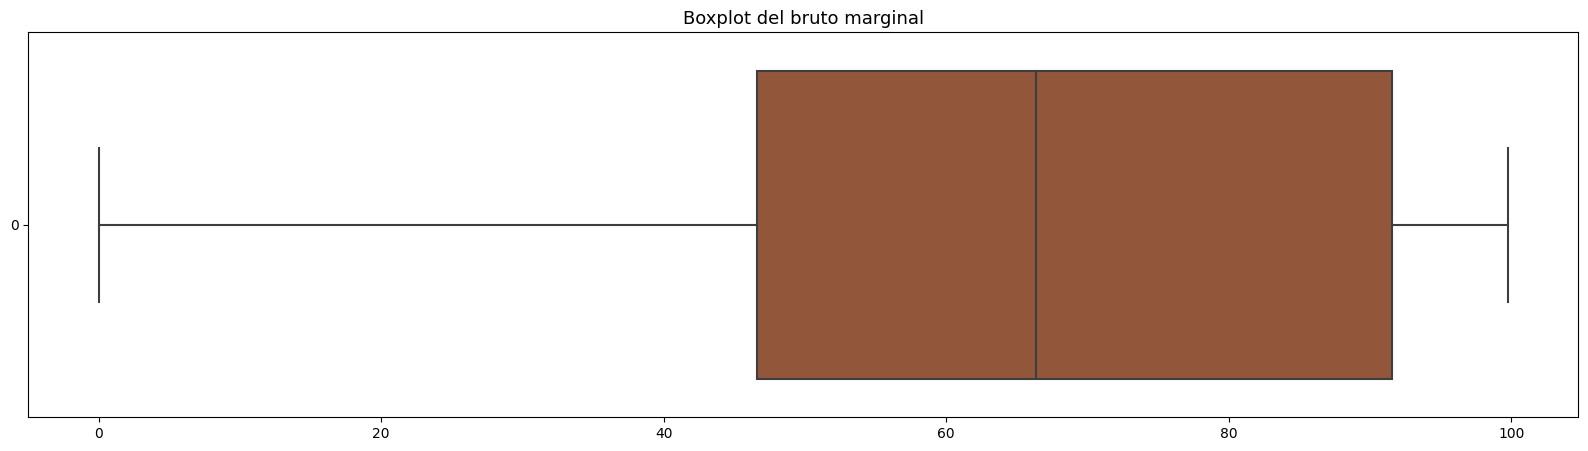

In [23]:
#No hay presencia de outliers
plt.figure(figsize=(20,5))
plt.title('Boxplot del bruto marginal', fontsize=13)

sns.boxplot(numbers_gen["gross_margin"], color="sienna", orient="h");

In [9]:
numbers_gen = numbers_gen[numbers_gen['gross_margin'] >= 0]
numbers_gen.info()
numbers_gen.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512223 entries, 0 to 856642
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie              512223 non-null  object 
 1   genres             512223 non-null  object 
 2   averagerating      512223 non-null  float64
 3   production_budget  512223 non-null  int64  
 4   domestic_gross     512223 non-null  int64  
 5   worldwide_gross    512223 non-null  int64  
 6   year               512223 non-null  object 
 7   profit             512223 non-null  int64  
 8   gross_margin       512223 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 39.1+ MB


,movie,genres,averagerating,production_budget,domestic_gross,worldwide_gross,year,profit,gross_margin
0,Avatar,Action,6.1,425000000,760507625,2776345279,2009,2351345279,84.692106
1,Avatar,Adventure,6.1,425000000,760507625,2776345279,2009,2351345279,84.692106
2,Avatar,Fantasy,6.1,425000000,760507625,2776345279,2009,2351345279,84.692106
3,Avatar,Sci-Fi,6.1,425000000,760507625,2776345279,2009,2351345279,84.692106
4,Pirates of the Caribbean: On Stranger Tides,Action,6.6,410600000,241063875,1045663875,2011,635063875,60.733080


In [10]:
gen = numbers_gen.groupby(numbers_gen.genres)

In [11]:
media_presup = gen['production_budget'].mean()
media_presup.sort_values(ascending=False, inplace=True)
media_presup = media_presup[1:11]
media_presup

#el primer valor aparece como nan, pero isna() devuelve 0 Nan, por lo que he decidido obviar ese género

genres
Musical      9.020359e+07
Adventure    7.882702e+07
Western      6.418497e+07
Animation    5.270369e+07
Family       4.886409e+07
Sci-Fi       4.643661e+07
Romance      4.597035e+07
Comedy       4.557225e+07
Fantasy      4.499940e+07
Thriller     4.031382e+07
Name: production_budget, dtype: float64

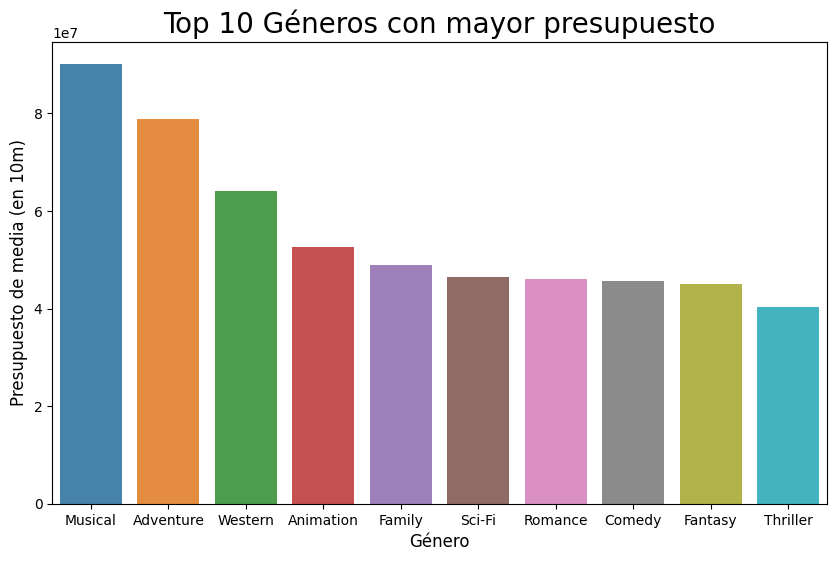

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=media_presup.index, y=media_presup.values, alpha=0.9)
plt.title('Top 10 Géneros con mayor presupuesto', fontsize=20)
plt.ylabel('Presupuesto de media (en 10m)', fontsize=12)
plt.xlabel('Género', fontsize=12) 
plt.show();

In [13]:
media_prof = gen['profit'].mean()
media_prof.sort_values(ascending=False, inplace=True)
media_prof=media_prof[:10]

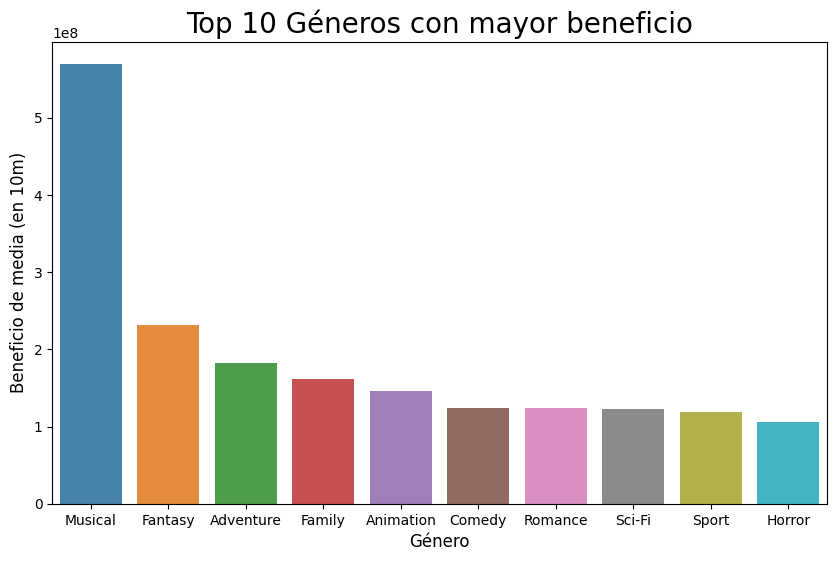

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=media_prof.index, y=media_prof.values, alpha=0.9)
plt.title('Top 10 Géneros con mayor beneficio', fontsize=20)
plt.ylabel('Beneficio de media (en 10m)', fontsize=12)
plt.xlabel('Género', fontsize=12) 
plt.show();

In [15]:
media_profit = gen['profit'].mean()
media_profit.sort_values(ascending=False, inplace=True)

In [16]:
correlation1 = media_profit.corr(media_presup)
correlation1
#Correlación positiva entre presupuesto y beneficio. A un mayor presupuesto el beneficio será mayor

0.6725033659504164

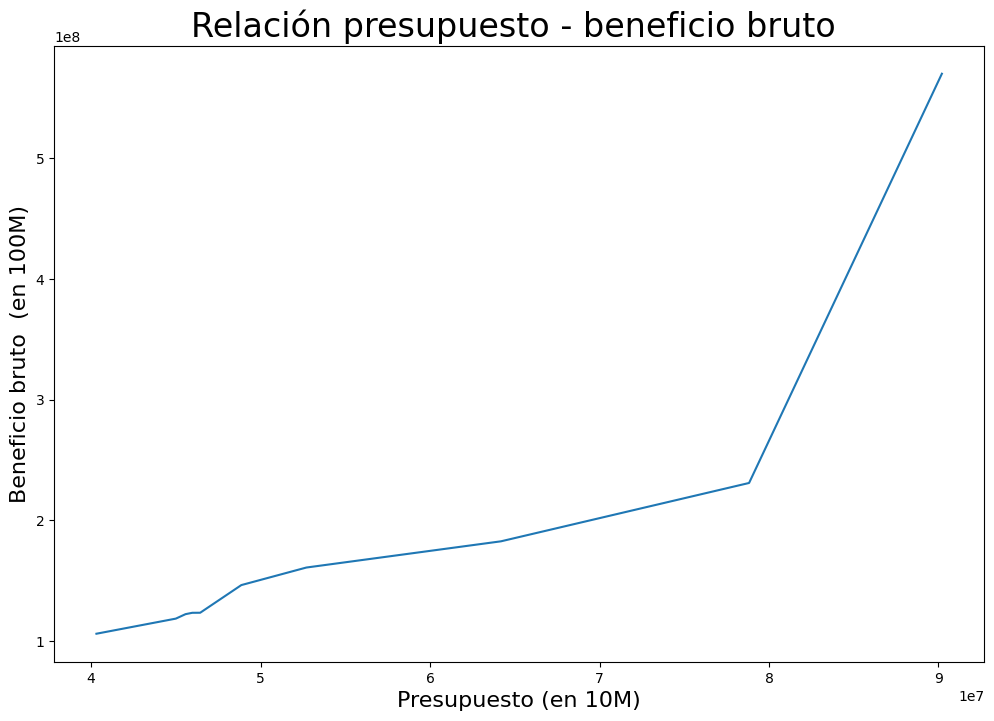

In [26]:
media_profit = media_profit[:10,]

plt.figure(figsize=(12,8))
sns.lineplot(x=media_presup.values, y=media_profit.values, alpha=1)
plt.title('Relación presupuesto - beneficio bruto ', fontsize=24)
plt.ylabel('Beneficio bruto  (en 100M)', fontsize=16)
plt.xlabel('Presupuesto (en 10M)', fontsize=16) 
plt.show()

Calculamos la media del bruto marginal

In [27]:
mean_margin = gen['gross_margin'].mean().round(decimals=2)
mean_margin.sort_values(ascending=False, inplace=True)
mean_margin = mean_margin[:10,]
%store mean_margin

Stored 'mean_margin' (Series)


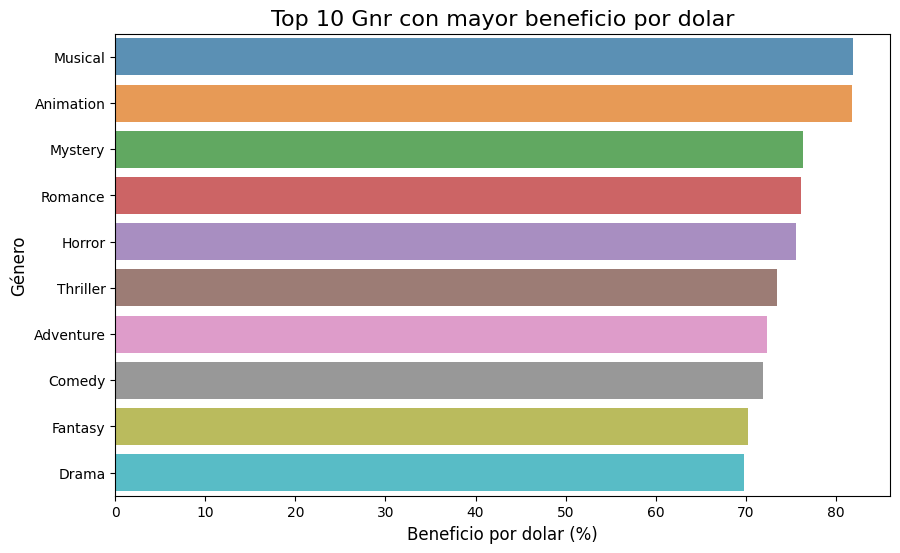

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=mean_margin.values, y=mean_margin.index, alpha=0.8)
plt.title('Top 10 Gnr con mayor beneficio por dolar', fontsize=16)
plt.ylabel('Género', fontsize=12)
plt.xlabel('Beneficio por dolar (%)', fontsize=12) 
plt.show()

In [29]:
correlation2 = media_presup.corr(mean_margin)
correlation2

0.4514967608511818

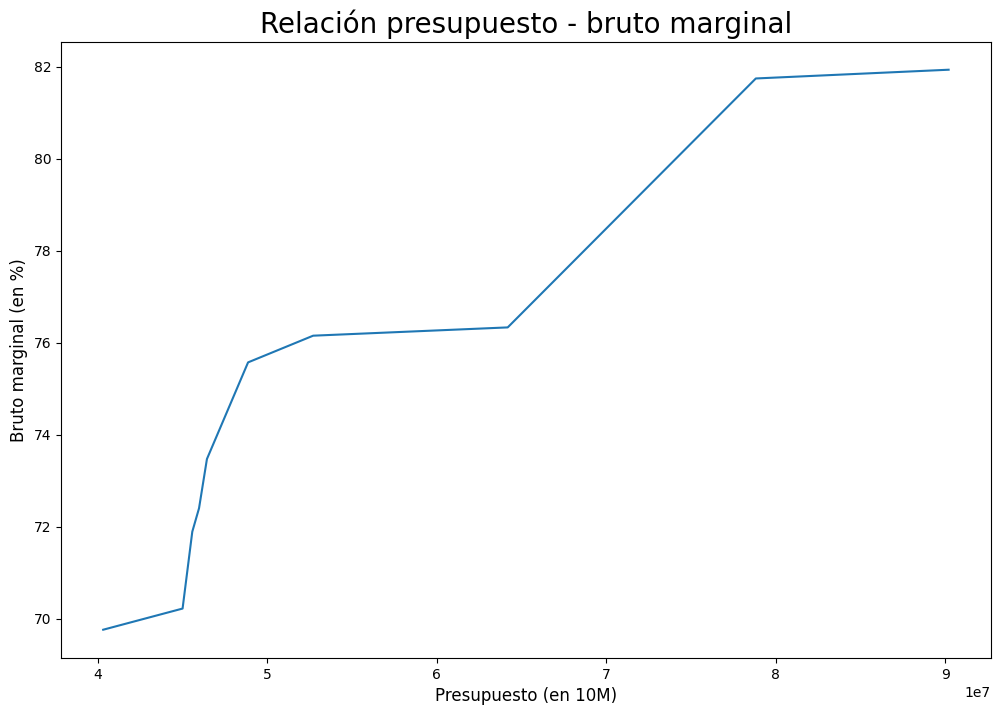

In [30]:
mean_margin = mean_margin[:10,]
plt.figure(figsize=(12,8))
sns.lineplot(x=media_presup.values, y=mean_margin.values, alpha=1)
plt.title('Relación presupuesto - bruto marginal', fontsize=20)
plt.ylabel('Bruto marginal (en %)', fontsize=12)
plt.xlabel('Presupuesto (en 10M)', fontsize=12) 
plt.show()

In [31]:
#La correlación es leve, pero interesante comprobar que a partir de 80 m de presupuseto el beneficio marginal deja de aumentar